In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
a = pd.read_csv('res/news_summary/부산_장애인_이동권_요약_0.4.csv', encoding='utf-8')
b = pd.read_csv('res/news_summary/부산_저상버스_요약_0.4.csv', encoding='utf-8')
c = pd.read_csv('res/news_summary/저상버스_불편_요약_0.4.csv', encoding='utf-8')
total = pd.concat([a,b,c])
total.reset_index(drop=True)
total.to_csv('./res/news_summary/기사요약병합.csv')

In [4]:
f = open('./res/news_summary/기사요약병합.csv', encoding='utf-8')
lines = f.readlines()
len(lines)
# lines
f.close()

In [4]:
from konlpy.tag import Hannanum

In [5]:
hannanum = Hannanum()

In [6]:
dataset = []

for i in range(len(lines)):
    dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]', '', lines[i])))
    
print(dataset[:5])  

[['기사요약'], ['문', '교통약자', '이동지원센터', '교통약자', '이동권', '보장', '휠체어', '탑승', '시설', '장착', '특수차량', '운행', '대중교통', '이용', '장애인', '노약자', '등', '편리', '안전', '이용', '수', '특별교통수단', '서비스', '제공한다운행지역은', '양평군', '관내', '운행', '원칙', '병원진료', '한해', '인접지역', '서울시', '경기', '구리시', '가평군', '남양주시', '하남시', '광주시', '이천시', '여주시', '강원', '홍천군', '횡성군', '원주시', '지역', '이용', '가능하다이용요금은', '양평군', '관내', '이내', '원', '원', '요금', '추', '최대', '원이다양평군', '관', '편도', '경우', '기본료', '만원', '당', '원', '왕복', '경우', '시간이내', '기본료', '만원', '당', '원', '반', '하루예약', '가능'], ['장애인', '이동편의', '지방자치단체', '의무적', '확보', '특별교통수단장애', '콜택시', '시군별', '보유비율', '편차', '것', '나타났다지난해', '기준', '전국', '개', '시기초', '특별교통수단', '평균', '도입율', '경기', '남양주시', '광주시', '안성시', '등', '법정도입대수', '대', '대', '대', '불구', '특별교통수단', '운행', '전무했다지난해', '기준', '전국', '특별교통수단', '운행대수', '대', '법정기준대수', '대', '시도별', '경상남도', '법정도입대수', '대', '도입율', '지역', '강원도', '법정도입대수', '대', '의원', '지역', '저상버스', '도입', '확대', '시설', '개보수', '등', '장애', '이동권', '보장', '노력', '발전', '전체적', '때', '장애', '들', '안심', '이동', '수', '충분한', '환경여건', '것', '현실', '지적

In [7]:
dataset2 = []

for v in dataset :
    list_temp = []
    for i in range(len(v)) :
        if len(v[i]) > 1 :
            list_temp.append(v[i])
    
    #print(list_temp)
    dataset2.append(list_temp)

print(dataset2[:5])

[['기사요약'], ['교통약자', '이동지원센터', '교통약자', '이동권', '보장', '휠체어', '탑승', '시설', '장착', '특수차량', '운행', '대중교통', '이용', '장애인', '노약자', '편리', '안전', '이용', '특별교통수단', '서비스', '제공한다운행지역은', '양평군', '관내', '운행', '원칙', '병원진료', '한해', '인접지역', '서울시', '경기', '구리시', '가평군', '남양주시', '하남시', '광주시', '이천시', '여주시', '강원', '홍천군', '횡성군', '원주시', '지역', '이용', '가능하다이용요금은', '양평군', '관내', '이내', '요금', '최대', '원이다양평군', '편도', '경우', '기본료', '만원', '왕복', '경우', '시간이내', '기본료', '만원', '하루예약', '가능'], ['장애인', '이동편의', '지방자치단체', '의무적', '확보', '특별교통수단장애', '콜택시', '시군별', '보유비율', '편차', '나타났다지난해', '기준', '전국', '시기초', '특별교통수단', '평균', '도입율', '경기', '남양주시', '광주시', '안성시', '법정도입대수', '불구', '특별교통수단', '운행', '전무했다지난해', '기준', '전국', '특별교통수단', '운행대수', '법정기준대수', '시도별', '경상남도', '법정도입대수', '도입율', '지역', '강원도', '법정도입대수', '의원', '지역', '저상버스', '도입', '확대', '시설', '개보수', '장애', '이동권', '보장', '노력', '발전', '전체적', '장애', '안심', '이동', '충분한', '환경여건', '현실', '지적했다', '특별교통수단', '운영', '지자체', '재정자립도', '영향', '중요', '자치단체장', '의지', '장애', '이동권', '보장', '중앙정부', '지방정부', '확연', '의지', '노력', '지적'], ['모두', '관광'

In [15]:
from apyori import apriori

result = (list(apriori(dataset2, min_suppoer=0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x : len(x))
df = df[(df['length'] == 2) & (df['support'] > 0.01)].sort_values(by='support', ascending=False)
df

,items,support,ordered_statistics,length
135,"(이동권, 장애)",0.285902,"[((), (이동권, 장애), 0.28590192644483364, 1.0), ((...",2
145,"(장애인, 장애)",0.267513,"[((), (장애인, 장애), 0.26751313485113837, 1.0), ((...",2
146,"(장애, 저상버스)",0.252627,"[((), (장애, 저상버스), 0.2526269702276708, 1.0), ((...",2
140,"(장애, 이용)",0.225044,"[((), (장애, 이용), 0.22504378283712784, 1.0), ((이...",2
152,"(휠체어, 장애)",0.220228,"[((), (휠체어, 장애), 0.2202276707530648, 1.0), ((장...",2
...,...,...,...,...
125,"(지하철, 요구)",0.100701,"[((), (지하철, 요구), 0.10070052539404553, 1.0), ((...",2
116,"(요구, 시위)",0.100701,"[((), (요구, 시위), 0.10070052539404553, 1.0), ((시...",2
120,"(시위, 출근길)",0.100263,"[((), (시위, 출근길), 0.10026269702276708, 1.0), ((...",2
101,"(지하철, 불편)",0.100263,"[((), (지하철, 불편), 0.10026269702276708, 1.0), ((...",2


In [9]:
G = nx.Graph()
ar = (df['items'])
G.add_edges_from(ar)

In [10]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [27]:
pos = nx.kamada_kawai_layout(G)

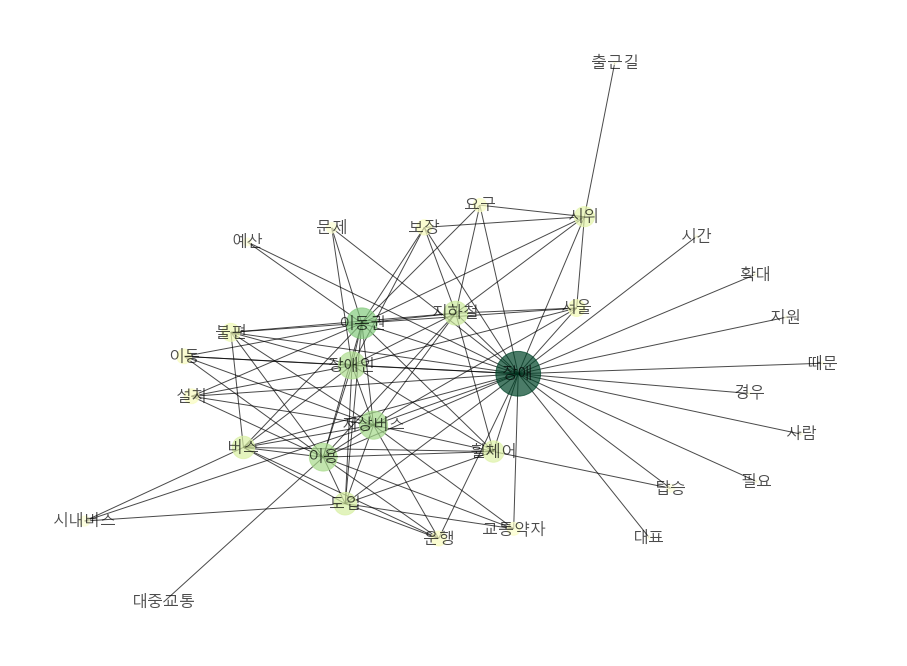

In [28]:
plt.figure(figsize=(16,12))
plt.axis('off')

nx.draw_networkx(G, font_family='Malgun Gothic', font_size=16,
                    pos=pos, node_color=list(pr.values()), node_size=nsize,
                    alpha=0.7, cmap=plt.cm.YlGn)